# 결정트리

- (개정판)파이썬 라이브러리를 활용한 머신러닝, 한빛미디어, 2019.
    - 2.3.5 결정트리(decision tree)

데이터 분석 
수집 -> 정제(전처리)-> 분석-> 배포

수집- 시계열 or 시계열 아님
정제-> 시계열 or 시계열 아님
분석-> 시계열 or 시계열 아님
배포

## 공통

In [1]:
%config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [2]:
from preamble import *

## 결정 트리를 활용한 회귀

### DT-Q5 결정트리를 사용해서 `ram_price`을 분석하여, 가격을 예측하세요.
- [ ] DT-Q5(a). pandas를 사용해서 "ram_price.csv" 파일을 `ram_prices` 객체를 생성하세요.

pandas에서 index 뺴고 저장

In [3]:
ram_prices= pd.read_csv("data/ram_price.csv")
ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.11e+08
1,1,1959.00,6.79e+07
2,2,1960.00,5.24e+06
3,3,1965.00,2.64e+06
4,4,1970.00,7.34e+05
...,...,...,...
328,328,2015.58,4.50e-03
329,329,2015.67,4.30e-03
330,330,2015.75,4.20e-03
331,331,2015.83,3.80e-03


- [ ] DT-Q5(b). `ram_prices` 변수를 `년도/가격` 그래프로 표현하세요.
    - y축의 지수에 `-`값을 표현할 수 없기 때문에 y축의 폰트를 `consolas`로 변경하세요.
    - x축과 y축에 label을 표시하세요("년" / "가격 ($/Mbyte)")
    - 일반적인 선 그래프를 사용하세요.   

log로 바꿀때는 데이터가 2진데이터인가, 10진인가, 60인가 고려해야함. default는 10 

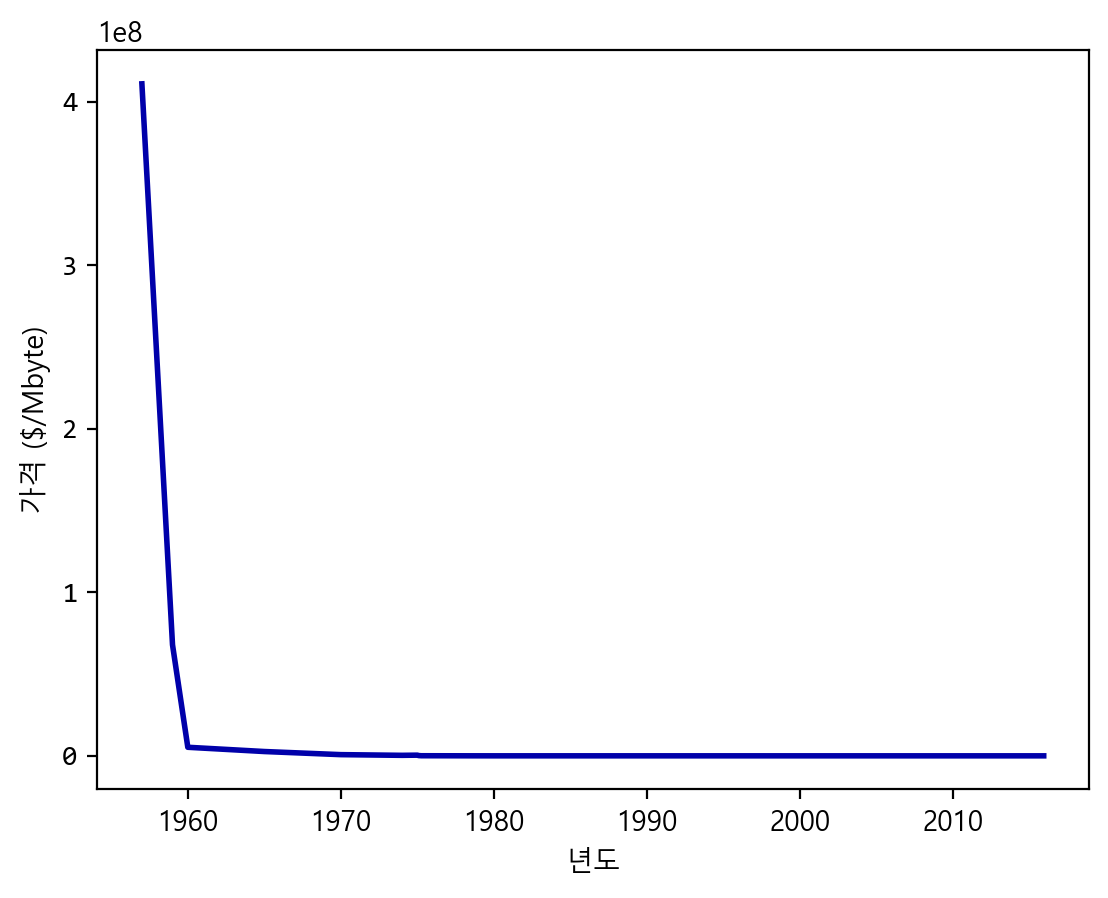

In [10]:
plt.yticks(fontname = "consolas")
plt.plot(ram_prices.date, ram_prices.price)

plt.xlabel("년도")
plt.ylabel("가격 ($/Mbyte)")
plt.show()

- [ ] DT-Q5(c). `ram_prices` 변수를 `년도/가격` 그래프로 표현하세요.
    - 해당 그래프를 `log` 그래프로 변경하세요.

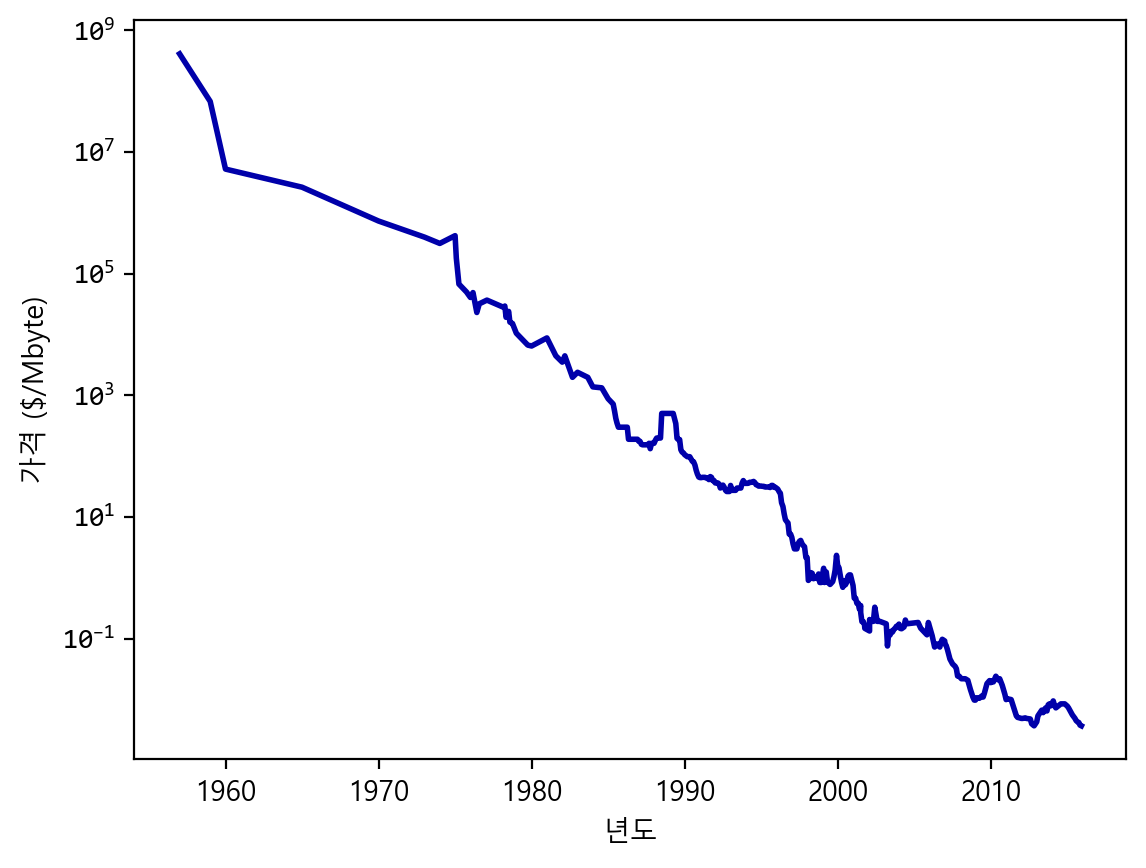

In [11]:
plt.yticks(fontname = "consolas")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년도")
plt.ylabel("가격 ($/Mbyte)")
plt.show()

- [ ] DT-Q5(d). 학습데이터와 테스트 데이터를 분리하세요.
    - 학습 데이터는 1999년까지 데이터를 사용하세요.
    - 테스트 데이터는 1999년 이후 데이터를 사용하세요.

In [16]:

data_train = ram_prices[ram_prices.date <2000]
data_test = ram_prices[ram_prices.date >= 2000]



- [ ] DT-Q5(e). 학습데이터와 테스트 데이터를 분류하여 작성하세요.
    - y값은 log 함수를 적용하세요.

시계열 데이터는 1차행열로는 안됨.

pandas와 numpy는 반복처리를 해줌.
//할 줄 알아야하는것.
bool index
컬럼을 새로 만들고, 새로 추가하는 방법 
컬럼을 삭제하는 방법
데이터를 밖으로 뽑아내는 방법

In [22]:
n = []
for i in data_train.date:
  t=[i,]
  n.append(t)
n  


[[1957.0],
 [1959.0],
 [1960.0],
 [1965.0],
 [1970.0],
 [1973.0],
 [1974.0],
 [1975.0],
 [1975.08],
 [1975.25],
 [1975.75],
 [1976.0],
 [1976.17],
 [1976.42],
 [1976.58],
 [1977.08],
 [1978.17],
 [1978.25],
 [1978.33],
 [1978.5],
 [1978.58],
 [1978.75],
 [1979.0],
 [1979.75],
 [1980.0],
 [1981.0],
 [1981.58],
 [1982.0],
 [1982.17],
 [1982.67],
 [1983.0],
 [1983.67],
 [1984.0],
 [1984.58],
 [1985.0],
 [1985.33],
 [1985.42],
 [1985.5],
 [1985.58],
 [1985.67],
 [1985.83],
 [1985.92],
 [1986.0],
 [1986.08],
 [1986.17],
 [1986.25],
 [1986.33],
 [1986.42],
 [1986.5],
 [1986.58],
 [1986.67],
 [1986.75],
 [1986.92],
 [1987.0],
 [1987.08],
 [1987.17],
 [1987.25],
 [1987.33],
 [1987.42],
 [1987.5],
 [1987.58],
 [1987.67],
 [1987.75],
 [1987.83],
 [1987.92],
 [1988.0],
 [1988.08],
 [1988.17],
 [1988.33],
 [1988.42],
 [1988.5],
 [1988.58],
 [1988.67],
 [1988.75],
 [1988.83],
 [1988.92],
 [1989.0],
 [1989.08],
 [1989.17],
 [1989.25],
 [1989.42],
 [1989.5],
 [1989.58],
 [1989.67],
 [1989.75],
 [1989

numpy는 빠르고 쉽게 행열을 처리하기 위한 것.

In [ ]:
X_train = data_train.date.to_numpy()[:, np.newaxis]
y_train = np.log(data_train.price)


0      19.83
1      18.03
2      15.47
3      14.79
4      13.51
       ...  
197    -0.25
198    -0.14
199     0.04
200     0.29
201     0.85
Name: price, Length: 202, dtype: float64

- [ ] DT-Q5(f). 결정트리의 회귀와 선형 회귀 예측기를 생성하고, 데이터에 학습을 진행하세요.
    - tree
    - linear_reg

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
#함수 체이닝
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train,y_train)



- DT-Q5(g). 두 예측기에 테스트를 진행하세요.
    - 테스트에 사용되는 데이터는 모든 데이터를 활용하세요.

In [29]:
X_all = ram_prices.date.to_numpy()[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

print(pred_tree, pred_lr)

[19.834 18.034 15.472 14.787 13.506 12.898 12.659 12.952 12.102 11.121
 10.818 10.614 10.799 10.045 10.373 10.513 10.24  10.29   9.863 10.086
  9.68   9.629  9.262  8.81   8.776  9.083  8.407  8.166  8.404  7.591
  7.782  7.591  7.229  7.194  6.78   6.579  6.31   6.04   5.858  5.704
  5.704  5.704  5.704  5.704  5.704  5.704  5.247  5.247  5.247  5.247
  5.247  5.247  5.247  5.17   5.17   5.056  5.037  5.037  5.037  5.037
  5.037  5.094  4.89   5.094  5.094  5.094  5.204  5.293  5.293  5.293
  6.225  6.225  6.225  6.225  6.225  6.225  6.225  6.225  6.225  6.225
  5.841  5.283  5.236  5.236  4.852  4.762  4.727  4.663  4.588  4.588
  4.494  4.416  4.396  4.27   4.078  3.932  3.818  3.795  3.795  3.807
  3.807  3.807  3.78   3.78   3.721  3.835  3.807  3.684  3.684  3.592
  3.592  3.592  3.55   3.401  3.481  3.512  3.434  3.314  3.27   3.27
  3.27   3.5    3.314  3.314  3.314  3.314  3.401  3.401  3.401  3.401
  3.584  3.684  3.578  3.578  3.578  3.584  3.619  3.619  3.619  3.651
  3.611

- DT-Q5(h). 예측된 값을 기존값으로 변환하세요.

In [30]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)


- DT-Q5(i). 기존 데이터와 예측 데이터 모두를 시각화하세요.

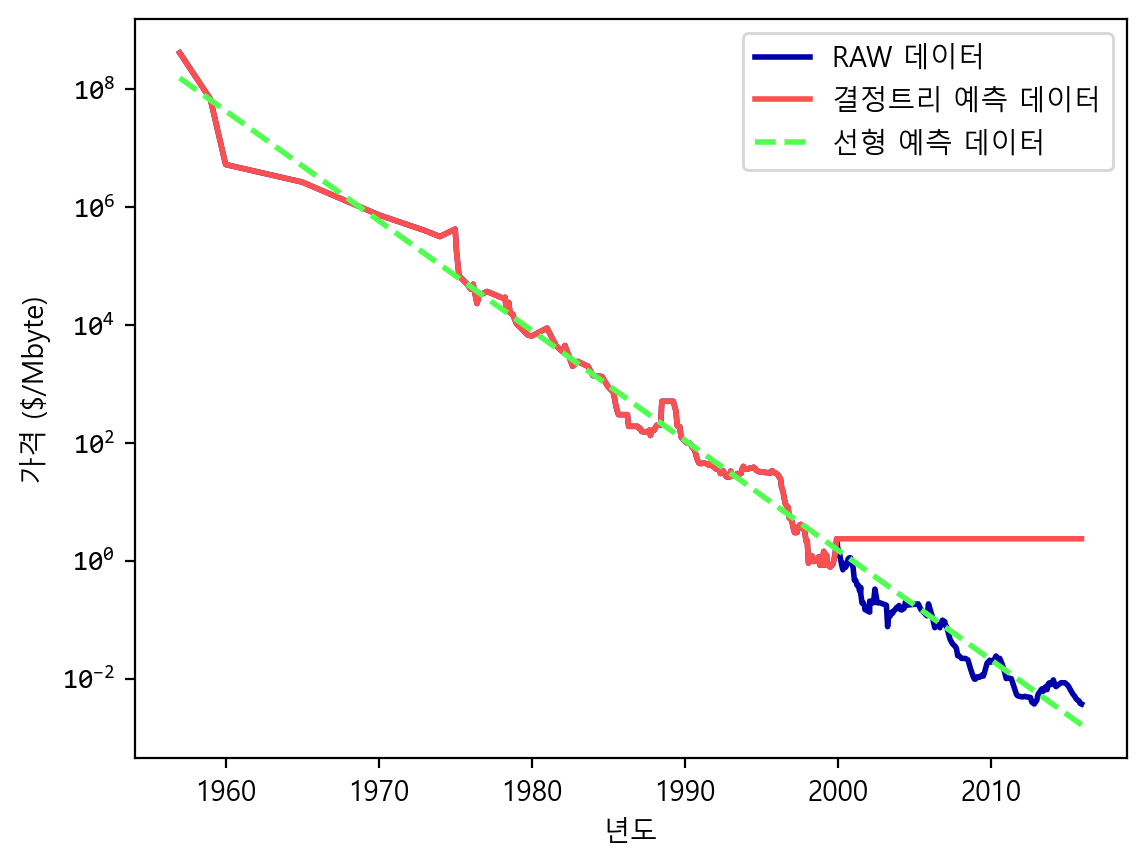

In [38]:
plt.yticks(fontname = "consolas")
plt.semilogy(ram_prices.date, ram_prices.price, label = "RAW 데이터")
plt.semilogy(ram_prices.date, price_tree, label = "결정트리 예측 데이터")
plt.semilogy(ram_prices.date, price_lr, label = "선형 예측 데이터")
plt.xlabel("년도")
plt.ylabel("가격 ($/Mbyte)")
plt.legend()
plt.show()

결정트리,랜덤포레스트는 이전 데이터에 대해서는 잘 맞추지만, 예측은 별로 않좋음
선형 회귀는 과거에도 오류가 제법있으나, 예측값이 얼추 맞음.

시계열은 이전 데이터의 영향이 작음. 
일단 선형 그어보고, 랜덤포레스트나 결정트리로 중요 feature 확인

전처리 종류: minmax 스케일, 정규분포 , 

비지도 학습: 전처리, 특성추출(PCA, TSNE, 등등), 군집(DBSACN) ex) k-means, 
특성을 추출해서, 그것으로 군집화.

